# Part II - (Presentation Title)
## by Robert Weber


## Investigation Overview

In this investigation I want to look at some features of the loan dataset that can be used for predicting the Borrower APR. I mainly focus on the loan amount, the employment status, the Prosper rating, and the loan amount and loan term in relation to the employment status and the Borrower APR..

## Dataset Overview

This data is based on a dataset from online loan marketplace "Prosper", containing 113,937 loans associated with 81 variables on each loan. I removed the majority of the variables and focused my exploration on 12 key variables, that contain the previous mentioned features my investifation is based on.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("prosperLoanData.csv")

In [3]:
# Convert ProsperRating (Alpha) into ordered categorical types
ordinal_var = {'ProsperRating (Alpha)': ['HR','E','D','C','B','A','AA']}

for i in ordinal_var:
    ordered = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_var[i])
    df[i]=df[i].astype(ordered)

In [4]:
# Clean the dataframe in keeping only the needed columns from the dataset and save as new dataset
df_new = df[['BorrowerAPR','Term','ProsperRating (Alpha)','EmploymentStatus','IsBorrowerHomeowner','OpenCreditLines',
         'StatedMonthlyIncome','LoanOriginalAmount','ListingCategory (numeric)','CurrentDelinquencies','TradesNeverDelinquent (percentage)']]

In [5]:
# Replace "Full-time", "Self-employed", and "Part-time" with "Employed"
df_new=df_new.replace({'EmploymentStatus':{'Full-time':'Employed','Self-employed':'Employed','Part-time':'Employed'}})

# Remove entries with employment status "Other"
df_new=df_new.query("EmploymentStatus !='Other'")

# Remove entries with employment status "Not available"
df_new=df_new.query("EmploymentStatus !='Not available'")

In [6]:
# Check for NAN values and remove them as I am otherwise running into an error printing the plot
df_new.BorrowerAPR.isna().sum()

# Remove NAN values
df_new.dropna(subset=['BorrowerAPR'], inplace=True)

## Distribution of Borrower APR
The Annual Percentage Rate as the yearly fee for taking the loan ranges from extreme low rates at around 0.006 to rates up to 0.51, while the most notable ones are in the range from 0.05 to 0.4. The rate is normaly distributed with a mean of around 0.22. There is a notable spark at 0.36.

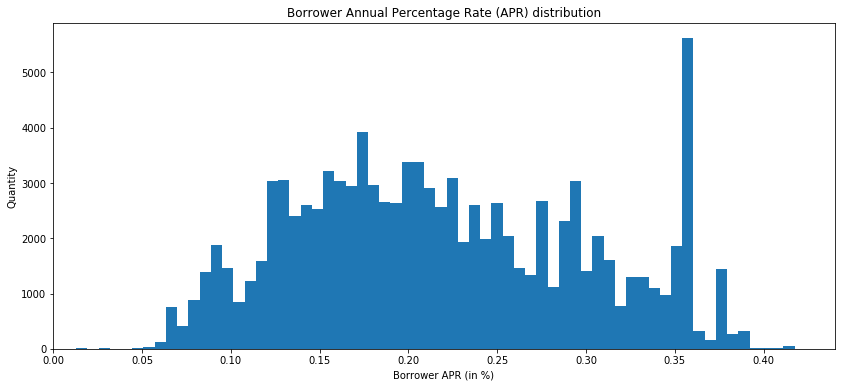

In [7]:
plt.figure(figsize=[14, 6])
plt.hist(data=df_new, x='BorrowerAPR', bins=80);
plt.xlim((0,0.44))
plt.xlabel('Borrower APR (in %)')
plt.ylabel('Quantity')
plt.title('Borrower Annual Percentage Rate (APR) distribution');

## Distribution of Loan amount
The loan amount is the amount a borrower is taking a loan for. The histogram is slightly right skewed with the majority of taken loans between 1000 and 10.000 USD. The minimum loan amount a borrower can take is 1000 USD. The loan amount most often taken is at 4000 USD. Also there are frequent spikes every 5000 USD starting at 5000 (then 10000, 15000, 20000,..) seeming to be the most popular choices in loan taking.

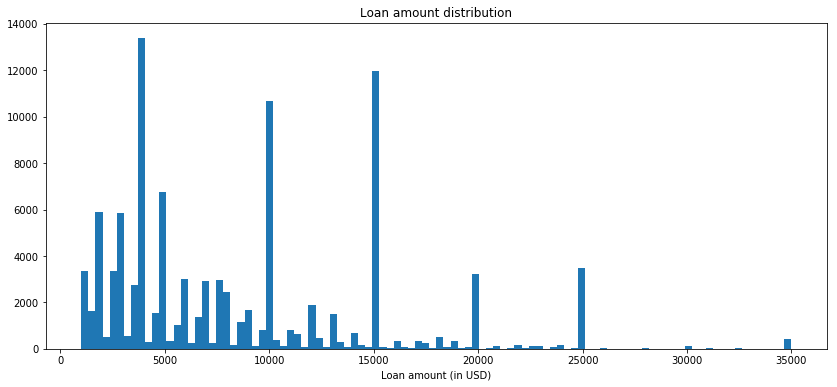

In [8]:
plt.figure(figsize=[14, 6])
plt.hist(data=df_new, x='LoanOriginalAmount', bins=100);
plt.xlabel('Loan amount (in USD)')
plt.title('Loan amount distribution');

## Distribution of Employment status
The employment status shows that most borrowers, approximately 100k, are being employed, followed by borrowers with the status "Not employed", and "Retired".

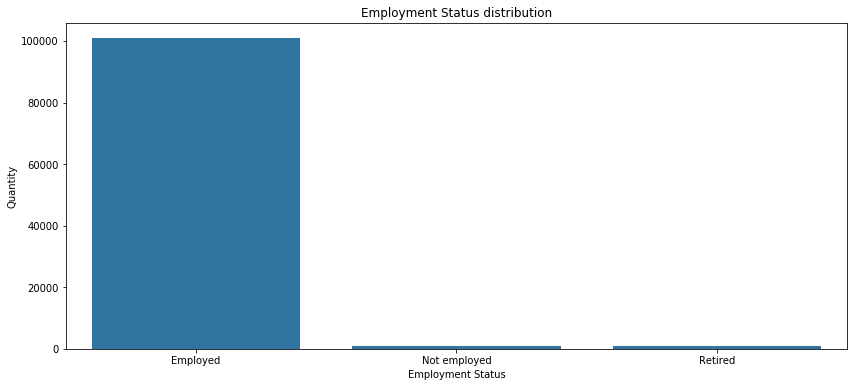

In [9]:
plt.figure(figsize=[14, 6])
color=sb.color_palette()[0]
count=df_new['EmploymentStatus'].value_counts().index
sb.countplot(data=df_new, x='EmploymentStatus', color=color, order=count)

plt.xlabel('Employment Status')
plt.ylabel('Quantity')
plt.title('Employment Status distribution');

### Prosper rating vs Borrower APR
The Prosper rating is an internal scoring mechanism to categorize loans. The plot shows a strong correlation between the rating score and the Borrower APR. The higher/better the rating, the lower the borrower rate/interest rate a borrower has to pay. It shows a clearer demarcation between the scores and the interest rate distribution. Here every rating has only a small overlap of the span of the interest rate with the upcoming rating, like AA going from 0.05 to 0.15 and A going from 0.10 to 0.17. 

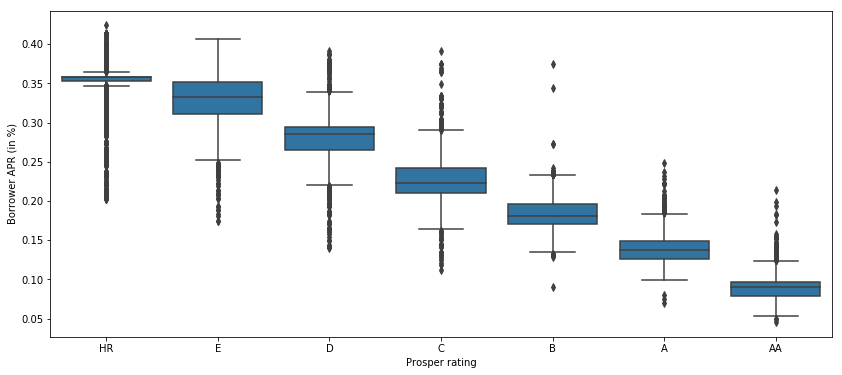

In [10]:
plt.figure(figsize=[14, 6])
color=sb.color_palette()[0]
sb.boxplot(data=df_new, x='ProsperRating (Alpha)', y='BorrowerAPR', color=color)
plt.xlabel('Prosper rating')
plt.ylabel('Borrower APR (in %)');

### Loan original amount in comparison with Employment status and Borrower APR
Employed borrowers tend to pay lower fees the higher the loan amount, with loan amounts going up to 35.000 USD. But in general they cover the whole range of fees for loans from 1.000 to 25.000 USD whereas there is a huge drop in the heigth of the APR for loans bigger than 25k.<br>
Another picture shows for the unemployed borrowers. While they seem to also take advantage of low APR for credits at 1.000 USD, the picture changes fast as the rates increase the higher the loan amount and up until 15k USD. Most of the unemployed borrowers can be found taking loans between 1.000 and 5.000 USD.<br>
The mayority of retired borrower on the other hand, seems to take loans from 1.000 to 15k USD the most. Similar to the employed borrower they can also be found paying APR within the whole range, but other than the employed borrower, there is a tendency for retired borrowers to pay even lower APR at lower loan amounts. So the variety isn't that large anymore with rising loan amounts and the APR span is smaller than for employed borrowers.

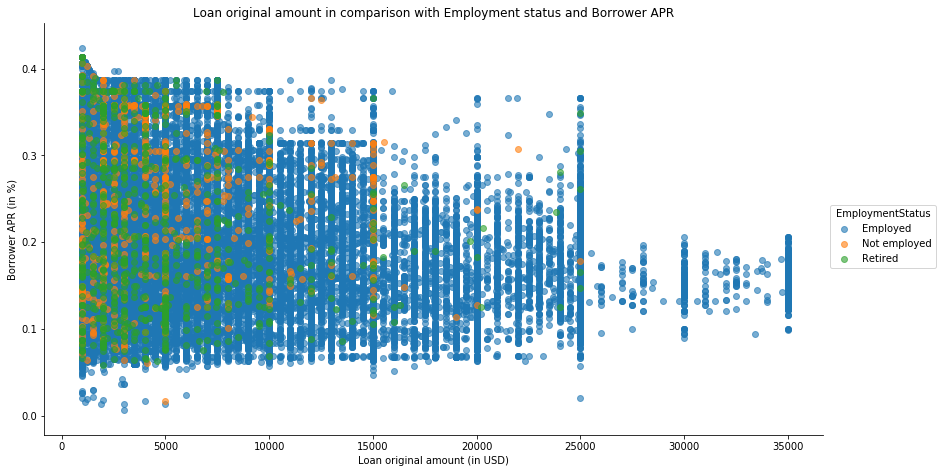

In [37]:
g=sb.FacetGrid(data=df_new, hue='EmploymentStatus', size=6.5, aspect=1.8)
g.map(plt.scatter,'LoanOriginalAmount', 'BorrowerAPR', alpha=0.6)
g.add_legend()

plt.xlabel('Loan original amount (in USD)')
plt.ylabel('Borrower APR (in %)')
plt.title('Loan original amount in comparison with Employment status and Borrower APR');

### Loan term in comparison with Employment status and Borrower APR
Looking at the results for the term, I will investigate employed borrowers first. While shorter, 12 month, loans are covering the whole range of rates, the range descreases the longer the loan term. Not employed borrowers start already at high rates, with a median of over 0.3, and the APR span is interestingly widening for terms of 26 months. while still paying higher fees than employed borrowers, there are still plenty of borrowers being able to secure a lower APR than within a 12 month term.

For a 36 month term the span is shrinking, but we can see that the median is lower than for 36 term loans and the conditions seem to be better for unemployed borrowers for long term.
For retired borrowers it is interesting to see that there is barely any retired borrower taking loans for 12 months. They are taking loans for 36 months with a similar outcome as employed borrowers, but with a slighly better/lower APR then these. For 60 month term loans the conditions are similar to the employed borrowers.

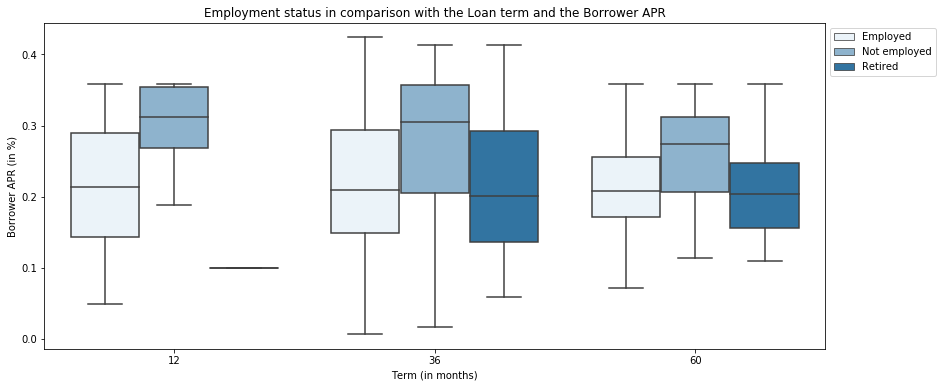

In [12]:
plt.figure(figsize=[14, 6])
color=sb.color_palette()[0]
sb.boxplot(data=df_new, x="Term", y="BorrowerAPR", hue="EmploymentStatus", color=color)
plt.title('Employment status in comparison with the Loan term and the Borrower APR')
plt.xlabel('Term (in months)')
plt.ylabel('Borrower APR (in %)')
plt.legend(bbox_to_anchor=(1,1), loc=2);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_notebook.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_notebook.ipynb to slides
[NbConvertApp] Writing 617064 bytes to Part_II_notebook.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_notebook.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not found


### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
